In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [333]:
data = pd.read_csv("/home/vatsal/Downloads/train (4).csv")

In [334]:
test_data = pd.read_csv("/home/vatsal/Downloads/test (2).csv")

In [335]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [336]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [339]:
alley = data[['Id','Alley']]
salePrice = data[['Id','SalePrice']]

In [340]:
alley_sale = pd.merge(alley,salePrice,on='Id')

In [341]:
alley_sale = alley_sale.dropna(axis=0)

In [342]:
alley_sale[alley_sale['Alley'] == 'Grvl']['SalePrice'].mean()

122219.08

In [343]:
alley_sale[alley_sale['Alley'] == 'Pave']['SalePrice'].mean()

168000.58536585365

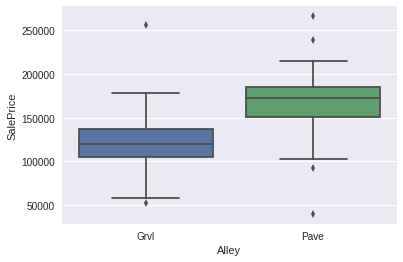

In [344]:
sns.boxplot(x='Alley',y='SalePrice',data=alley_sale)

In [345]:
data.drop('Alley',axis=1,inplace=True)

In [346]:
test_data.drop('Alley',axis=1,inplace=True)

/home/vatsal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


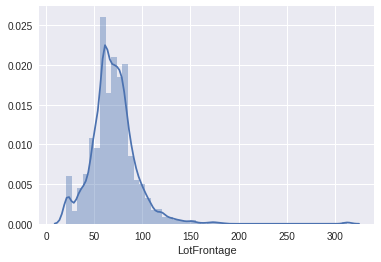

In [347]:
sns.distplot(data['LotFrontage'].dropna())

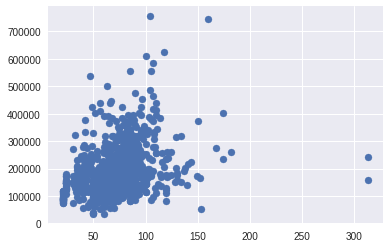

In [348]:
plt.scatter(data['LotFrontage'],data['SalePrice'])

In [349]:
data['LotFrontage'].mean()

70.04995836802665

In [350]:
data['LotFrontage'].median()

69.0

In [352]:
data['LotFrontage'].fillna(data["LotFrontage"].mean(),inplace=True)

In [353]:
test_data['LotFrontage'].fillna(data["LotFrontage"].mean(),inplace=True)

In [354]:
data.drop(data[['PoolQC','Fence','MiscFeature']],axis=1,inplace=True)

In [356]:
test_data.drop(test_data[['PoolQC','Fence','MiscFeature']],axis=1,inplace=True)

In [357]:
data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

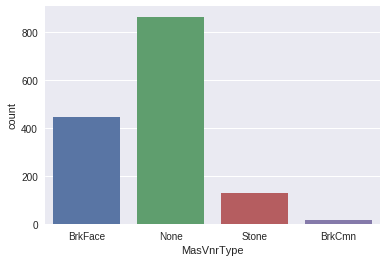

In [358]:
sns.countplot(data['MasVnrType'])

In [359]:
data['MasVnrType'].fillna('None',inplace=True)

In [360]:
test_data['MasVnrType'].fillna('None',inplace=True)

In [361]:
data["MasVnrType"].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

/home/vatsal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


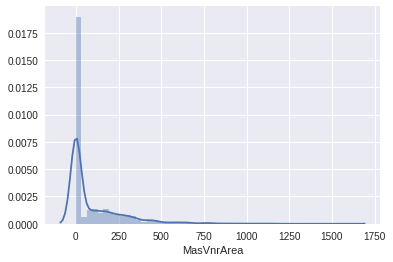

In [362]:
sns.distplot(data['MasVnrArea'].dropna())

In [363]:
data['MasVnrArea'].mean()

103.68526170798899

In [364]:
data['MasVnrArea'].median()

0.0

In [365]:
data['MasVnrArea'].fillna(0.0,inplace=True)

In [366]:
test_data['MasVnrArea'].fillna(0.0,inplace=True)

In [367]:
data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

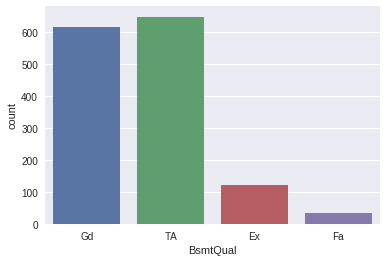

In [368]:
sns.countplot(data['BsmtQual'].dropna())

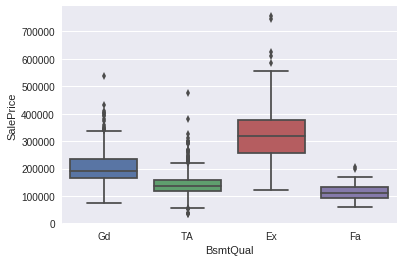

In [369]:
sns.boxplot(x='BsmtQual',y='SalePrice',data=data)

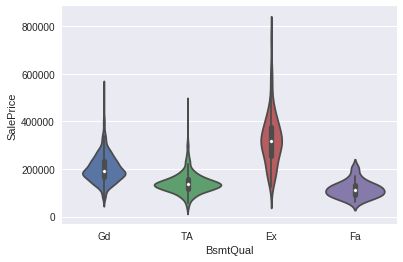

In [370]:
sns.violinplot(x='BsmtQual',y='SalePrice',data=data)

In [371]:
'''gd_mean = data[data['BsmtQual'] == 'Gd']['SalePrice'].mean()
ta_mean = data[data['BsmtQual'] == 'TA']['SalePrice'].mean()
ex_mean = data[data['BsmtQual'] == 'Ex']['SalePrice'].mean()
fa_mean = data[data['BsmtQual'] == 'Fa']['SalePrice'].mean()'''

In [372]:
'''min_price = data['SalePrice'].min()
max_price = data['SalePrice'].max()'''

In [373]:
'''def Qual(cols):
    bqual = cols[0]
    sprice = cols[1]
    if pd.isnull(bqual):
        if (sprice >=min_price) & (sprice < (fa_mean + ta_mean)/2) :
            return 'Fa'
        if (sprice >=(fa_mean + ta_mean)/2) & (sprice < (gd_mean + ta_mean)/2) :
            return 'TA'
        if (sprice >=(gd_mean + ta_mean)/2) & (sprice < (gd_mean + ex_mean)/2) :
            return 'Gd'
        if (sprice >=(gd_mean + ex_mean)/2) & (sprice <= max_price) :
            return 'Ex'
    else:
        return bqual
    '''
    

In [374]:
'''data['BsmtQual'] = data[['BsmtQual','SalePrice']].apply(Qual,axis=1)'''    

In [375]:
test_data['BsmtQual'].fillna()

KeyError: "['SalePrice'] not in index"

In [378]:
data.isnull().sum(axis=1).value_counts()

0     751
1     597
6      66
5      30
4       8
10      6
9       1
2       1
dtype: int64

In [174]:
data['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

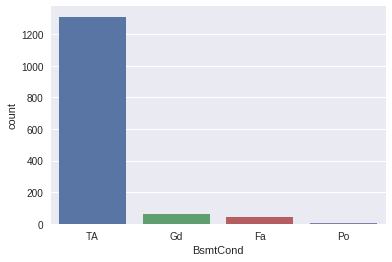

In [175]:
sns.countplot(data['BsmtCond'])

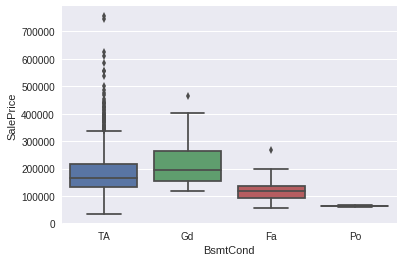

In [176]:
sns.boxplot(x = 'BsmtCond',y = 'SalePrice',data = data)

In [177]:
data['BsmtCond'].fillna('TA',axis=0,inplace=True)

In [178]:
data['BsmtCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [179]:
data['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

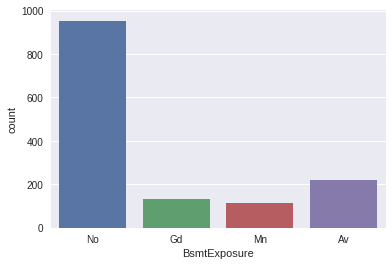

In [180]:
sns.countplot(data['BsmtExposure'])

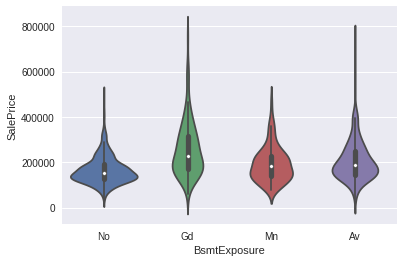

In [182]:
sns.violinplot(x='BsmtExposure',y='SalePrice',data=data)

In [183]:
data['BsmtExposure'].fillna('No',inplace=True)

In [208]:
array = data['BsmtFinType1'].unique()
array

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [210]:
my_list = np.delete(array,5)
my_list

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'], dtype=object)

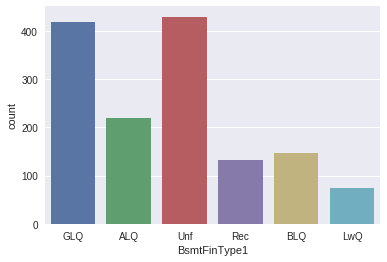

In [190]:
sns.countplot(data['BsmtFinType1'])

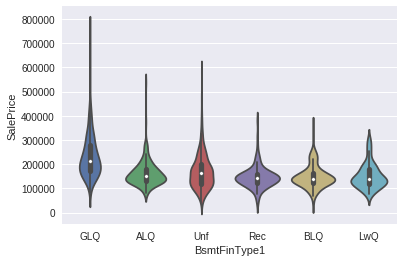

In [192]:
sns.violinplot(x='BsmtFinType1',y='SalePrice',data=data)

We Can compare this series with the other series also to get a relation of this!!

In [212]:
import random
data['BsmtFinType1'].fillna(random.choice(my_list),inplace=True)

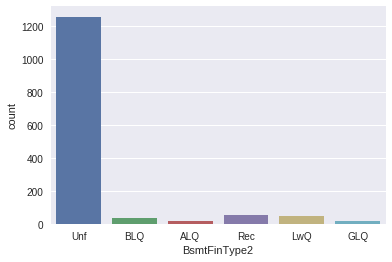

In [213]:
sns.countplot(data['BsmtFinType2'])

In [214]:
data['BsmtFinType2'].fillna('Unf',inplace=True)

In [215]:
data['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

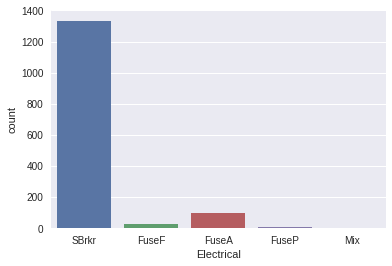

In [216]:
sns.countplot(data['Electrical'])

In [217]:
data['Electrical'].fillna('SBrkr',inplace=True)

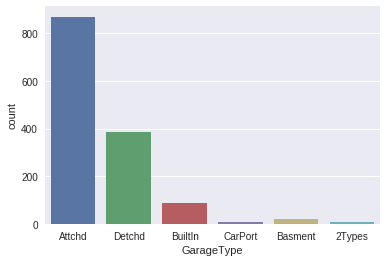

In [221]:
sns.countplot(data['GarageType'])

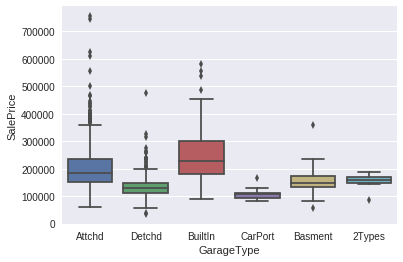

In [223]:
sns.boxplot(x='GarageType',y='SalePrice',data=data)

In [232]:
def typ(cols):
    gtype = cols[0]
    sprice = cols[1]
    if pd.isnull(gtype):
        if sprice < 15000:
            return "Attchd"
        else:
            return 'Detchd'
    else:
        return gtype

In [233]:
data['GarageType'] = data[['GarageType','SalePrice']].apply(typ,axis=1)

In [234]:
data['GarageType'].isnull().values.any()

False

/home/vatsal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


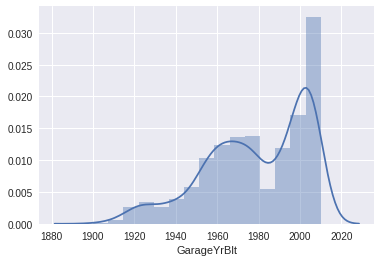

In [248]:
sns.distplot(data['GarageYrBlt'].dropna())

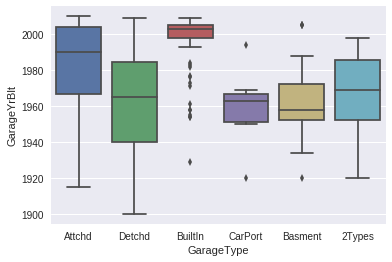

In [250]:
sns.boxplot(x='GarageType',y='GarageYrBlt',data=data)

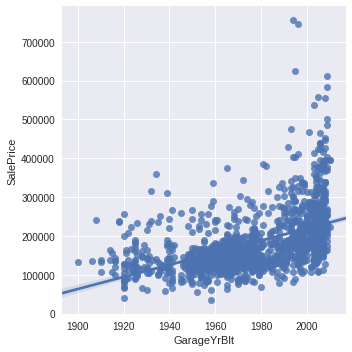

In [257]:
sns.lmplot(x='GarageYrBlt',y='SalePrice',data=data)

In [258]:
data['GarageYrBlt'].mean()

1978.5061638868744

In [259]:
data['GarageYrBlt'].median()

1980.0

In [260]:
data['GarageYrBlt'].mode()

0    2005.0
dtype: float64

In [262]:
data['GarageYrBlt'].fillna(1980.0,inplace=True)

/home/vatsal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


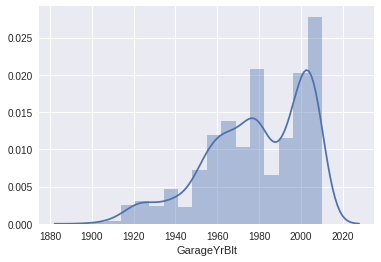

In [263]:
sns.distplot(data['GarageYrBlt'])

In [264]:
data['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

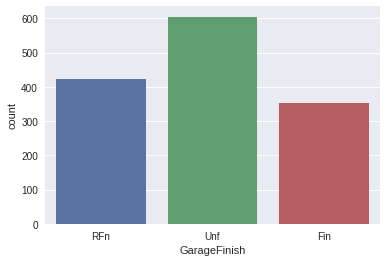

In [265]:
sns.countplot(data['GarageFinish'])

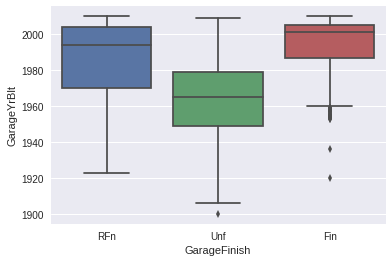

In [267]:
sns.boxplot(x='GarageFinish',y='GarageYrBlt',data=data)

In [279]:
def fin(cols):
    gf = cols[0]
    gyb = cols[1]
    if pd.isnull(gf):
        if gyb < 1980:
            return 'Unf'
        elif gyb < 1990:
            return 'RFn'
        else:
            return random.choice(['RFn','Fin'])
    else:
        return gf

In [280]:
data['GarageFinish'] = data[['GarageFinish','GarageYrBlt']].apply(fin,axis=1)

In [282]:
data[data['GarageFinish'].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [283]:
data['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

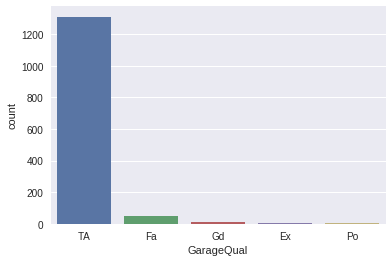

In [284]:
sns.countplot(data['GarageQual'])

In [285]:
data['GarageQual'].fillna('TA',inplace=True)

In [287]:
data['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

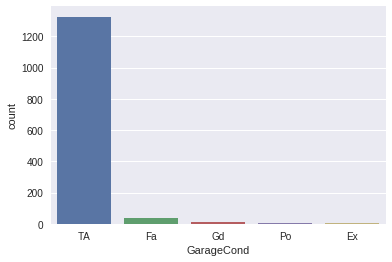

In [288]:
sns.countplot(data['GarageCond'])

In [289]:
data['GarageCond'].fillna('TA',inplace=True)

In [293]:
data.drop('FireplaceQu',axis=1,inplace=True)

In [294]:
data.isnull().values.any()

False

In [298]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
